In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

In [3]:
#Re-index so that content is the indexer and drop unnecessary columns
#Load dataframe for incubation
df = pd.read_excel(r"./2022_02_25_Brendan_LOD_optimisation .xlsx", index_col=2)
df = df.drop(columns = ['Well'])
df = df.set_index('Content')
df1 = df.iloc[:, : 58]

In [4]:
#Make variables for time and separate into triplicates
Time = df1.loc['Time [h]']*60

Trip1 = df1.loc['Sample X1']
Trip1_mean = Trip1.mean(axis=0)
Trip1_std = Trip1.std(axis=0)

Trip2 = df1.loc['Sample X2']
Trip2_mean = Trip2.mean(axis=0)
Trip2_std = Trip2.std(axis=0)

Trip3 = df1.loc['Sample X3']
Trip3_mean = Trip3.mean(axis=0)
Trip3_std = Trip3.std(axis=0)

Trip4 = df1.loc['Sample X4']
Trip4_mean = Trip4.mean(axis=0)
Trip4_std = Trip4.std(axis=0)

Trip5 = df1.loc['Sample X5']
Trip5_mean = Trip5[0:2].mean(axis=0)
Trip5_std = Trip5[0:2].std(axis=0)

Trip6 = df1.loc['Sample X6']
Trip6_mean = Trip6.mean(axis=0)
Trip6_std = Trip6.std(axis=0)

Trip7 = df1.loc['Sample X7']
Trip7_mean = Trip7.mean(axis=0)
Trip7_std = Trip7.std(axis=0)

Trip8 = df1.loc['Sample X8']
Trip8_mean = Trip8.mean(axis=0)
Trip8_std = Trip8.std(axis=0)

Trip9 = df1.loc['Sample X9']
Trip9_mean = Trip9.mean(axis=0)
Trip9_std = Trip9.std(axis=0)

Trip10 = df1.loc['Sample X10']
Trip10_mean = Trip10.mean(axis=0)
Trip10_std = Trip10.std(axis=0)

Trip11 = df1.loc['Sample X11']
Trip11_mean = Trip11.mean(axis=0)
Trip11_std = Trip11.std(axis=0)

Trip12 = df1.loc['Sample X12']
Trip12_mean = Trip12.mean(axis=0)
Trip12_std = Trip12.std(axis=0)

Trip13 = df1.loc['Sample X13']
Trip13_mean = Trip13.mean(axis=0)
Trip13_std = Trip13.std(axis=0)

Trip14 = df1.loc['Sample X14']
Trip14_mean = Trip14.mean(axis=0)
Trip14_std = Trip14.std(axis=0)

Trip15 = df1.loc['Sample X15']
Trip15_mean = Trip15.mean(axis=0)
Trip15_std = Trip15.std(axis=0)

Trip16 = df1.loc['Sample X16']
Trip16_mean = Trip16.mean(axis=0)
Trip16_std = Trip16.std(axis=0)

# Trip_mean = [Trip1_mean,Trip2_mean,Trip3_mean,Trip4_mean,Trip5_mean,Trip6_mean,Trip7_mean,Trip8_mean,Trip9_mean,Trip10_mean,Trip11_mean,Trip12_mean]
Trip_mean = [Trip1_mean,Trip2_mean,Trip3_mean,Trip4_mean,Trip5_mean,Trip6_mean,Trip7_mean,Trip8_mean,Trip9_mean,Trip10_mean,Trip11_mean,Trip12_mean,Trip13_mean,Trip14_mean,Trip15_mean,Trip16_mean]

In [5]:
#Plot all data 
fig = go.Figure(go.Scatter(
    ))
fig.add_trace(go.Scatter(x=Time, y=Trip1_mean, error_y = dict(type='data', array=Trip1_std), name = 'Buffer + Cas + crRNA + 0 pM target DNA'))
fig.add_trace(go.Scatter(x=Time, y=Trip2_mean, error_y = dict(type='data', array=Trip2_std), name = 'Buffer + Cas + crRNA + 234.9 pM target DNA'))
fig.add_trace(go.Scatter(x=Time, y=Trip3_mean, error_y = dict(type='data', array=Trip3_std), name = 'Buffer + Cas + crRNA + 469.9 pM target DNA', marker = dict(color = 'brown')))
fig.add_trace(go.Scatter(x=Time, y=Trip4_mean, error_y = dict(type='data', array=Trip4_std), name = 'Buffer + Cas + crRNA + 704.8 pM target DNA'))
fig.add_trace(go.Scatter(x=Time, y=Trip5_mean, error_y = dict(type='data', array=Trip5_std), name = 'Buffer + Cas + crRNA + 939.7 pM target DNA'))
fig.add_trace(go.Scatter(x=Time, y=Trip6_mean, error_y = dict(type='data', array=Trip6_std), name = 'Buffer + Cas + crRNA + 1174.6 pM target DNA'))
fig.add_trace(go.Scatter(x=Time, y=Trip7_mean, error_y = dict(type='data', array=Trip7_std), name = 'Buffer + Cas + crRNA + 1409.6 pM target DNA'))
fig.add_trace(go.Scatter(x=Time, y=Trip8_mean, error_y = dict(type='data', array=Trip8_std), name = 'Buffer + Cas + crRNA + 1644.5 pM target DNA'))
fig.add_trace(go.Scatter(x=Time, y=Trip9_mean, error_y = dict(type='data', array=Trip9_std), name = 'Buffer + Cas + crRNA + 1879.4 pM target DNA'))
fig.add_trace(go.Scatter(x=Time, y=Trip10_mean, error_y = dict(type='data', array=Trip10_std), name = 'Buffer + Cas + crRNA + 2114.4 pM target DNA'))
fig.add_trace(go.Scatter(x=Time, y=Trip11_mean, error_y = dict(type='data', array=Trip11_std), name = 'Buffer + Cas + crRNA + 2349.3 pM target DNA'))
fig.add_trace(go.Scatter(x=Time, y=Trip12_mean, error_y = dict(type='data', array=Trip12_std), name = 'Buffer + Cas + crRNA + 2584.2 pM target DNA'))
fig.add_trace(go.Scatter(x=Time, y=Trip13_mean, error_y = dict(type='data', array=Trip13_std), name = 'Buffer + Cas + crRNA + 2819.2 pM target DNA'))
fig.add_trace(go.Scatter(x=Time, y=Trip14_mean, error_y = dict(type='data', array=Trip14_std), name = 'Buffer + Cas + crRNA + 3054.1 pM target DNA'))
fig.add_trace(go.Scatter(x=Time, y=Trip15_mean, error_y = dict(type='data', array=Trip15_std), name = 'Buffer + Cas + crRNA + 3289 pM target DNA'))
fig.add_trace(go.Scatter(x=Time, y=Trip16_mean, error_y = dict(type='data', array=Trip16_std), name = 'Buffer + Cas + crRNA + 3523.9 pM target DNA'))
fig.update_layout(title="FQ5 probe lba Cas 12a Collateral Cleavage assay (gRNA 1 and ssDNA Target 1) 25/2/22", xaxis_title="Time (min)", yaxis_title="Fluorescence (AU)", legend_title="Reaction description", plot_bgcolor = 'white')


fig.show() 

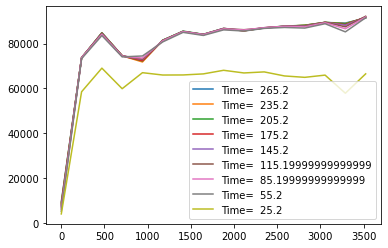

In [6]:
# np.array(Trip_mean)[5:, -1]
for i in range(1,10):
    i *= 6
    # plt.plot([0,1,2.5,5,10,25,50,100,250,1000,2000],np.array(Trip_mean)[:, -i][::-1]/np.max(np.array(Trip_mean)[:, -i]), label = 'Time=  {}'.format(Time[-i]))
    plt.plot([0,234.9,469.9,704.8,939.7,1174.6,1409.6,1644.5,1879.4,2114.4,2349.3,2584.2,2819.2,3054.1,3289,3523.9],np.array(Trip_mean)[:, -i], label = 'Time=  {}'.format(Time[-i]))
plt.legend()
# plt.xscale('log')
plt.show()

In [7]:
df_linear = pd.DataFrame({'concs':[0,234.9,469.9,704.8,939.7,1174.6,1409.6,1644.5,1879.4,2114.4,2349.3,2584.2,2819.2,3054.1,3289,3523.9],'values': np.array(Trip_mean)[:, -1]})
minimum = np.inf
step = 9
earlier = 10
for j in range(12):
    for k in range(40):
        X = np.array([0,234.9,469.9,704.8,939.7,1174.6,1409.6,1644.5,1879.4,2114.4,2349.3,2584.2,2819.2,3054.1,3289,3523.9])[j:].reshape(-1,1)
        y = np.array(Trip_mean)[:, -k][j:].reshape(-1,1)
        from sklearn.linear_model import LinearRegression
        reg = LinearRegression().fit(X, y)
        grad = reg.coef_
        grad
        std = np.std(reg.predict(X) - y)
        std
        limitD = 3 * std / grad
        if limitD < minimum and limitD > 0:
            minimum = limitD
            step = j
            earlier = k
minimum, step, earlier


(array([[286.36243398]]), 9, 4)

In [8]:
X = np.array([0,234.9,469.9,704.8,939.7,1174.6,1409.6,1644.5,1879.4,2114.4,2349.3,2584.2,2819.2,3054.1,3289,3523.9])[step:].reshape(-1,1)
y = np.array(Trip_mean)[:, -earlier][step:].reshape(-1,1)
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, y)
grad = reg.coef_
grad
std = np.std(reg.predict(X) - y)
std
limitD = 3 * std / grad

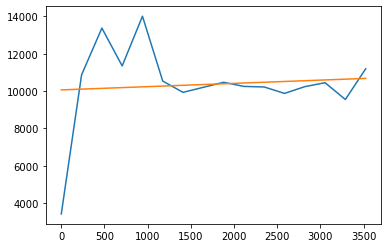

In [9]:
plt.plot(X,y)
plt.plot(X,reg.predict(X))

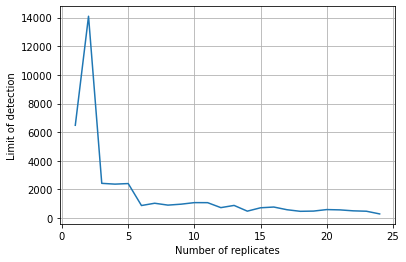

[array([[6479.41575825]]),
 array([[14098.0574872]]),
 array([[2422.31930649]]),
 array([[2367.47048245]]),
 array([[2406.79041715]]),
 array([[873.00496343]]),
 array([[1031.6627237]]),
 array([[900.8633616]]),
 array([[967.50838517]]),
 array([[1075.42191747]]),
 array([[1072.21130177]]),
 array([[725.58759871]]),
 array([[879.96941905]]),
 array([[479.4368696]]),
 array([[714.62602686]]),
 array([[767.52679386]]),
 array([[578.42444183]]),
 array([[468.3617761]]),
 array([[483.62195543]]),
 array([[589.64180529]]),
 array([[568.18186437]]),
 array([[501.77869915]]),
 array([[473.93464721]]),
 array([[286.36243398]])]

In [79]:
limitDs = []
for replicate in range(1,25):
    Trip1 = df1.loc['Sample X1'][:replicate]
    Trip1_mean = Trip1.mean(axis=0)
    Trip1_std = Trip1.std(axis=0)

    Trip2 = df1.loc['Sample X2'][:replicate]
    Trip2_mean = Trip2.mean(axis=0)
    Trip2_std = Trip2.std(axis=0)

    Trip3 = df1.loc['Sample X3'][:replicate]
    Trip3_mean = Trip3.mean(axis=0)
    Trip3_std = Trip3.std(axis=0)

    Trip4 = df1.loc['Sample X4'][:replicate]
    Trip4_mean = Trip4.mean(axis=0)
    Trip4_std = Trip4.std(axis=0)

    Trip5 = df1.loc['Sample X5'][:replicate]
    Trip5_mean = Trip5[0:2].mean(axis=0)
    Trip5_std = Trip5[0:2].std(axis=0)

    Trip6 = df1.loc['Sample X6'][:replicate]
    Trip6_mean = Trip6.mean(axis=0)
    Trip6_std = Trip6.std(axis=0)

    Trip7 = df1.loc['Sample X7'][:replicate]
    Trip7_mean = Trip7.mean(axis=0)
    Trip7_std = Trip7.std(axis=0)

    Trip8 = df1.loc['Sample X8'][:replicate]
    Trip8_mean = Trip8.mean(axis=0)
    Trip8_std = Trip8.std(axis=0)

    Trip9 = df1.loc['Sample X9'][:replicate]
    Trip9_mean = Trip9.mean(axis=0)
    Trip9_std = Trip9.std(axis=0)

    Trip10 = df1.loc['Sample X10'][:replicate]
    Trip10_mean = Trip10.mean(axis=0)
    Trip10_std = Trip10.std(axis=0)

    Trip11 = df1.loc['Sample X11'][:replicate]
    Trip11_mean = Trip11.mean(axis=0)
    Trip11_std = Trip11.std(axis=0)

    Trip12 = df1.loc['Sample X12'][:replicate]
    Trip12_mean = Trip12.mean(axis=0)
    Trip12_std = Trip12.std(axis=0)

    Trip13 = df1.loc['Sample X13'][:replicate]
    Trip13_mean = Trip13.mean(axis=0)
    Trip13_std = Trip13.std(axis=0)

    Trip14 = df1.loc['Sample X14'][:replicate]
    Trip14_mean = Trip14.mean(axis=0)
    Trip14_std = Trip14.std(axis=0)

    Trip15 = df1.loc['Sample X15'][:replicate]
    Trip15_mean = Trip15.mean(axis=0)
    Trip15_std = Trip15.std(axis=0)

    Trip16 = df1.loc['Sample X16'][:replicate]
    Trip16_mean = Trip16.mean(axis=0)
    Trip16_std = Trip16.std(axis=0)

    Trip_mean = [Trip1_mean,Trip2_mean,Trip3_mean,Trip4_mean,Trip5_mean,Trip6_mean,Trip7_mean,Trip8_mean,Trip9_mean,Trip10_mean,Trip11_mean,Trip12_mean,Trip13_mean,Trip14_mean,Trip15_mean,Trip16_mean]

    X = np.array([0,234.9,469.9,704.8,939.7,1174.6,1409.6,1644.5,1879.4,2114.4,2349.3,2584.2,2819.2,3054.1,3289,3523.9])[step:].reshape(-1,1)
    y = np.array(Trip_mean)[:, -earlier][step:].reshape(-1,1)
    from sklearn.linear_model import LinearRegression
    reg = LinearRegression().fit(X, y)
    grad = reg.coef_
    std = np.std(reg.predict(X) - y)
    limitDs.append(3 * std / grad)
plt.plot(np.arange(1,25),np.array(limitDs).ravel())
plt.xlabel('Number of replicates');plt.ylabel('Limit of detection');plt.grid()
plt.show()
limitDs

Seems best linear region to use if around 1nM, so [500,600,700,800,900,1000,1100,1200,1300,1400]pM

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def exponential(t, a, b, c):
    return a * (1-np.exp(-b * t)) + c
def sigmoid(x, L ,x0, k, b):
    y = L / (1 + np.exp(-k*(x-x0)))+b
    return (y)
t = Time 

In [12]:
def calcKValues(data, func, maxLimit = 20000, normalise = True, plot = False):
  y = data

  if func == 'exponential':
    popt, pcov = curve_fit(exponential, t.astype('float64'), y.astype('float64'), p0 = [np.max(y), 1, np.min(y)], maxfev=20000)
    return popt[1]

  if func == 'sigmoid':
    popt, pcov = curve_fit(sigmoid, t.astype('float64'), y.astype('float64'), p0 = [np.max(y), np.median(t), 1, np.min(y)], maxfev=20000)
    return popt[2]

In [15]:
ks = [calcKValues(mean, 'sigmoid') for mean in Trip_mean]

/Users/brendanhuo/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning:

overflow encountered in exp



RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 20000.

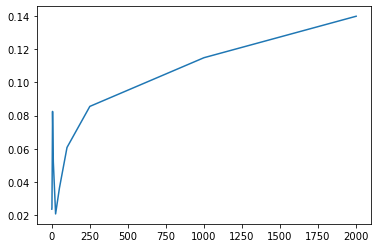

In [41]:
plt.plot([0,1,2.5,5,10,25,50,100,250,1000,2000],ks[::-1])
# plt.xscale('log')
plt.show()